In [18]:
import numpy as np
import pandas as pd 
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
files = [f for f in listdir('.\data') if isfile(join('.\data', f))]

df1 = pd.read_csv('./data/bitcoin-mean-hash-rate.csv')
for i in range(1, len(files)):
    df2 = pd.read_csv('./data/'+files[i])
    df = pd.merge(df1, df2, on='timestamp', how='outer')
    df1 = df 

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp').reset_index(drop=True)
df.head(15)

In [59]:
data_df = pd.read_csv('/Users/panxinwei/Desktop/data.csv')
data_df.set_index('timestamp', inplace = True)

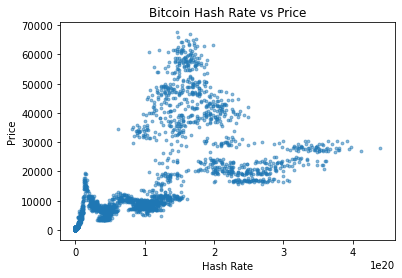

In [74]:
# hash rate and price
plt.scatter(data_df['mean_hash_rate'], data_df['price_usd_num'], alpha=0.5,s=8)
plt.title('Bitcoin Hash Rate vs Price')
plt.xlabel('Hash Rate')
plt.ylabel('Price')
plt.show()

In [82]:
from datetime import datetime
data_df.index = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S%z").strftime("%Y-%m-%d") for ts in data_df.index]

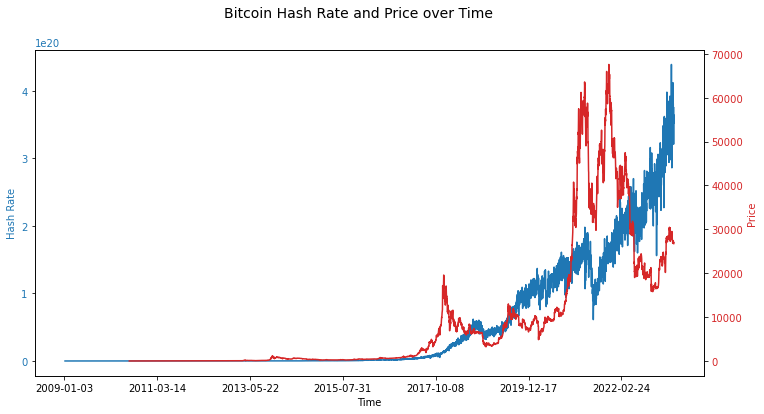

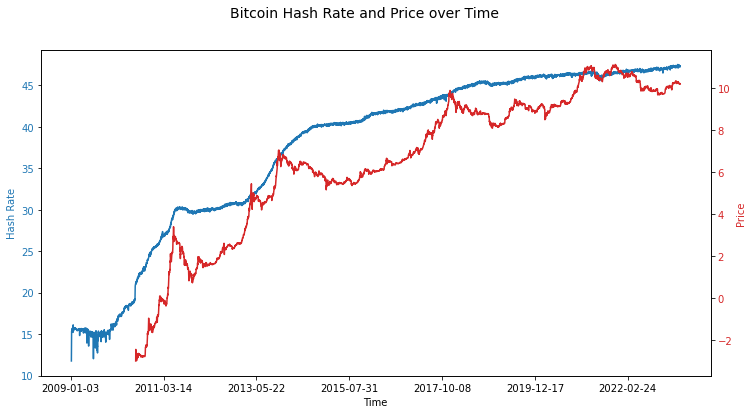

In [109]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Hash Rate', color=color)
ax1.plot(data_df.index, data_df['mean_hash_rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Price', color=color)
ax2.plot(data_df.index, data_df['price_usd_num'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Bitcoin Hash Rate and Price over Time', fontsize=14)
plt.xticks(data_df.index[::800]) 
plt.show()

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Hash Rate', color=color)
ax1.plot(data_df.index, np.log(data_df['mean_hash_rate']), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Price', color=color)
ax2.plot(data_df.index, np.log(data_df['price_usd_num']), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Bitcoin Hash Rate and Price over Time', fontsize=14)
plt.xticks(data_df.index[::800]) 

plt.show()

In [90]:
from scipy.stats import spearmanr
import math

In [98]:
Hash_rank=list(stats.rankdata(data_df['mean_hash_rate'],method='average'))
Price_rank=list(stats.rankdata(data_df['price_usd_num'],method='average'))
np.corrcoef(Hash_rank,Price_rank)[0,1]

0.40522140837382126

In [95]:
correlation = spearmanr(data_df['mean_hash_rate'], data_df['price_usd_num'], nan_policy='omit')
print(correlation)

SpearmanrResult(correlation=0.9605167916393013, pvalue=0.0)


Text(0, 0.5, 'Price rank')

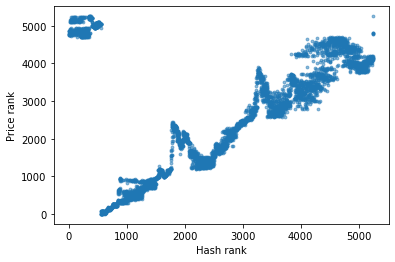

In [88]:
plt.scatter(Hash_rank,Price_rank, alpha=0.5, s=8)
plt.xlabel("Hash rank")
plt.ylabel("Price rank")

In [107]:
data_df.index

Index(['2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06', '2009-01-07',
       '2009-01-08', '2009-01-09', '2009-01-10', '2009-01-11', '2009-01-12',
       ...
       '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21'],
      dtype='object', length=5252)

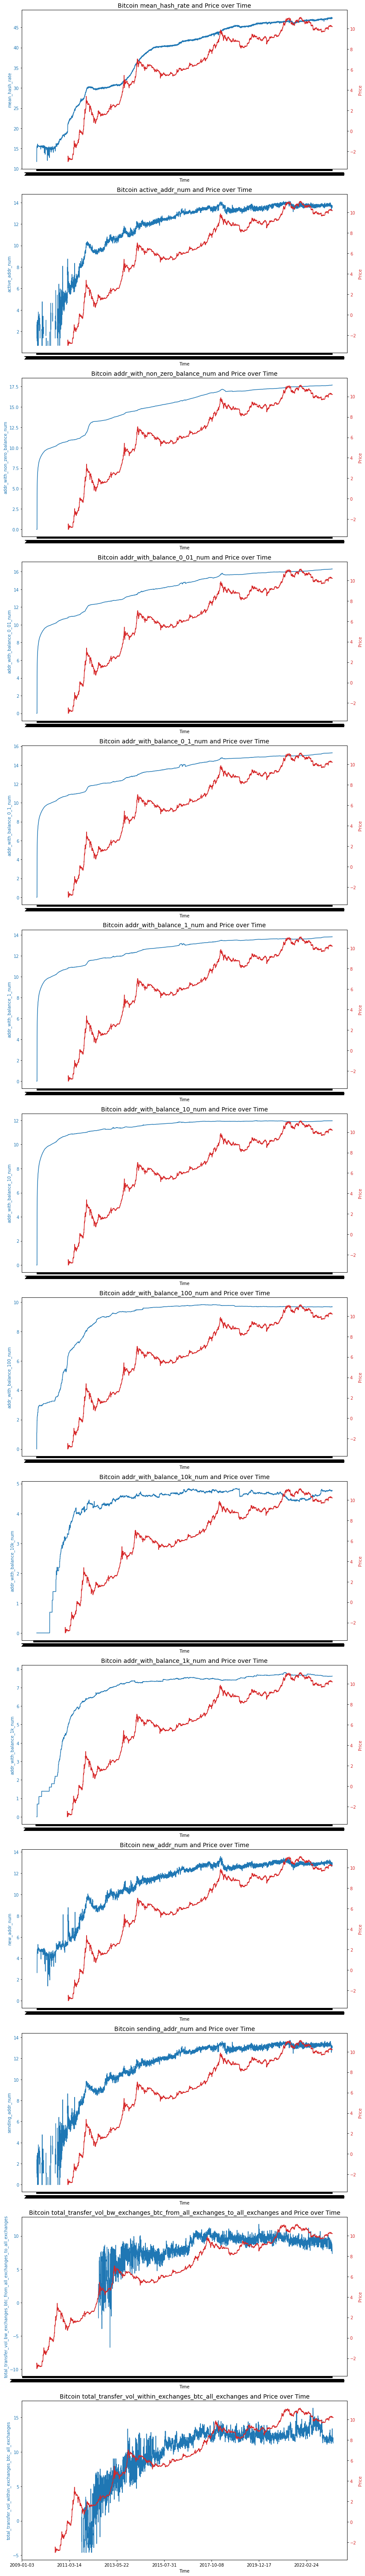

In [108]:
features = ['mean_hash_rate', 'active_addr_num', 'addr_with_non_zero_balance_num',
       'addr_with_balance_0_01_num', 'addr_with_balance_0_1_num',
       'addr_with_balance_1_num', 'addr_with_balance_10_num',
       'addr_with_balance_100_num', 'addr_with_balance_10k_num',
       'addr_with_balance_1k_num', 'new_addr_num', 'sending_addr_num',
       'total_transfer_vol_bw_exchanges_btc_from_all_exchanges_to_all_exchanges',
       'total_transfer_vol_within_exchanges_btc_all_exchanges']

fig, axs = plt.subplots(nrows=len(features), ncols=1,
                        figsize=(12, 6*len(features)))

for i, feature in enumerate(features):
    color = 'tab:blue'
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(feature, color=color)
    axs[i].plot(data_df.index, np.log(data_df[feature]), color=color)
    axs[i].tick_params(axis='y', labelcolor=color)

    ax2 = axs[i].twinx()

    color = 'tab:red'
    ax2.set_ylabel('Price', color=color)
    ax2.plot(data_df.index, np.log(data_df['price_usd_num']), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    axs[i].set_title(
        'Bitcoin {} and Price over Time'.format(feature), fontsize=14)

plt.tight_layout()
plt.xticks(data_df.index[::800]) 
plt.show()

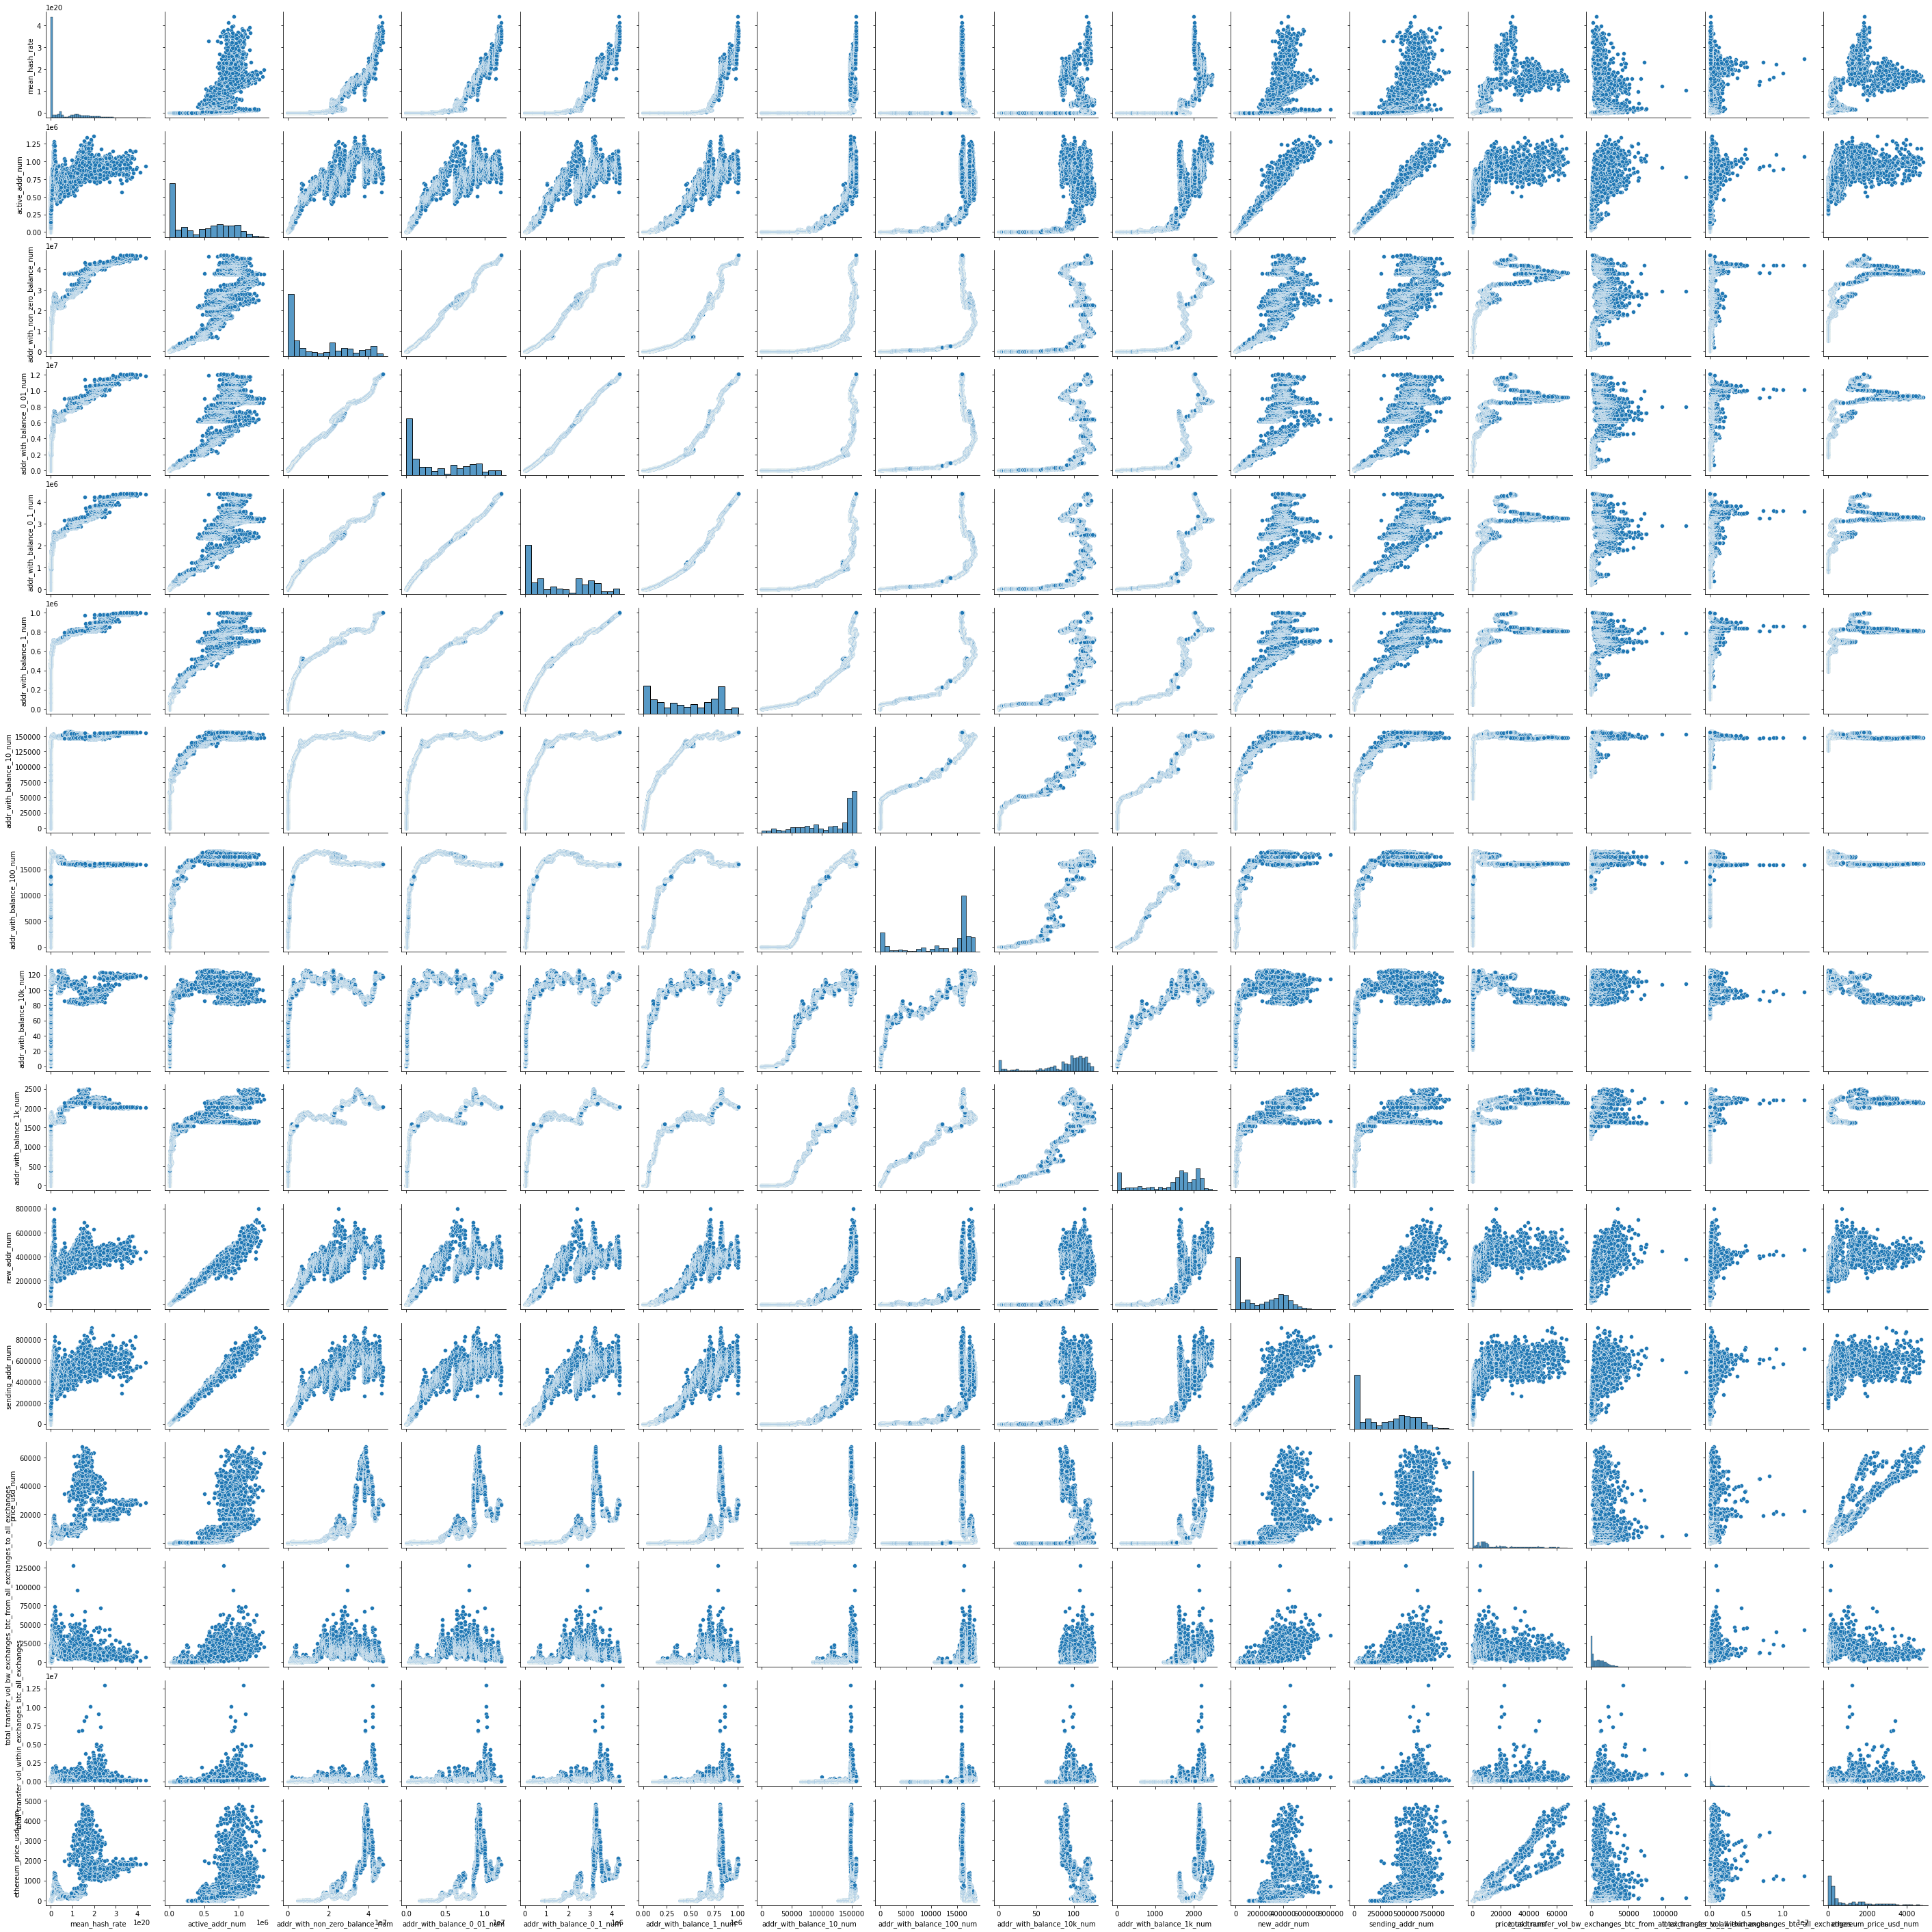

In [99]:
sns.pairplot(data_df)

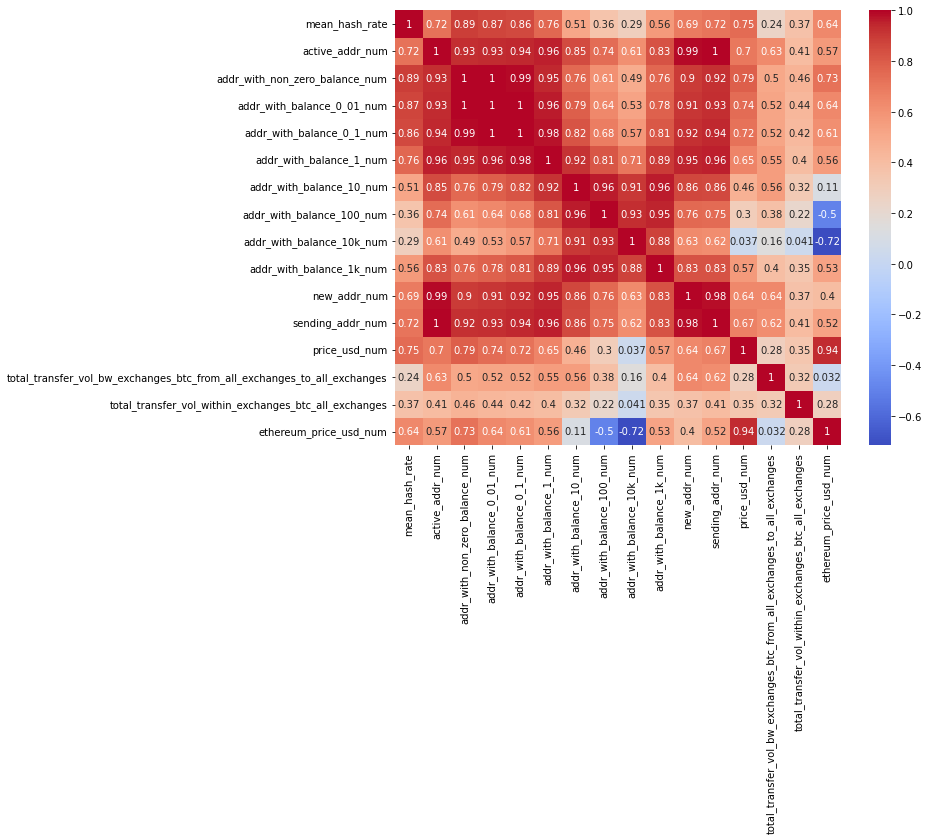

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [114]:
corr_matrix = data_df.corr()

corr_matrix['price_usd_num']

mean_hash_rate                                                             0.747461
active_addr_num                                                            0.698331
addr_with_non_zero_balance_num                                             0.791265
addr_with_balance_0_01_num                                                 0.742498
addr_with_balance_0_1_num                                                  0.719893
addr_with_balance_1_num                                                    0.651838
addr_with_balance_10_num                                                   0.463607
addr_with_balance_100_num                                                  0.297528
addr_with_balance_10k_num                                                  0.037133
addr_with_balance_1k_num                                                   0.565214
new_addr_num                                                               0.640241
sending_addr_num                                                           0

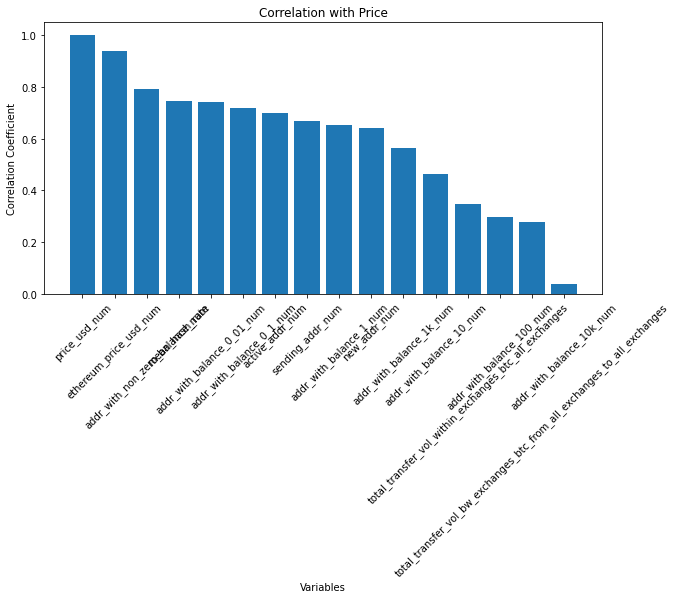

In [119]:
corr_with_price = corr_matrix['price_usd_num']

corr_with_price_sorted = corr_with_price.sort_values(ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(corr_with_price_sorted.index, corr_with_price_sorted.values)
plt.title('Correlation with Price')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [120]:
def plot_y(y_test,y_pred):
    plt.figure(figsize=(20, 8))
    plt.plot(y_test, label='actual')
    plt.plot(y_pred, label='predicted')
    plt.legend()
    plt.show()
    
def eval(y_test,y_pred):
    def mape(y_test, y_pred):
        return np.mean(np.abs((y_pred - y_test) / y_test)) * 100
    def smape(y_test, y_pred):
        return 2.0 * np.mean(np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

    metrics_dict = {}

    # MSE
    metrics_dict['MSE'] = metrics.mean_squared_error(y_test, y_pred)

    # RMSE
    metrics_dict['RMSE'] = np.sqrt(metrics_dict['MSE'])

    # MAE
    metrics_dict['MAE'] = metrics.mean_absolute_error(y_test, y_pred)

    # MAPE
    metrics_dict['MAPE'] = mape(y_test, y_pred)

    # SMAPE
    metrics_dict['SMAPE'] = smape(y_test, y_pred)

    # R2 Score
    metrics_dict['R2 Score'] = r2_score(y_test, y_pred)

    # Create Pandas DataFrame from metrics_dict and return
    return pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])

   

def plot_roll(test_y,test_predict,day):
    fig = plt.figure(figsize=(20, 8))
    # plt.style.use('fivethirtyeight')

    ax = fig.add_subplot(1,1,1)

    y1 = pd.DataFrame(test_y)
    y2 = pd.DataFrame(test_predict)
    y11 = y1.rolling(day).mean()
    y22 = y2.rolling(day).mean()
    ax.plot(y11,label="actual")
    ax.plot(y22 , label= "pred")

    plt.legend()
    fig.tight_layout(pad=3.0)
    plt.show()

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split into train and test sets
train_size = int(len(data_df) * 0.8)
test_size = len(data_df) - train_size
train_data, test_data = data_df.iloc[:train_size,:], data_df.iloc[train_size:,:]

# 导入MinMaxScaler用于将数据缩放到给定的范围
scaler = MinMaxScaler(feature_range=(0, 1))

# 对训练数据进行缩放
train_data_scaled = scaler.fit_transform(train_data)

# 对测试数据进行缩放
test_data_scaled = scaler.transform(test_data)

# 将训练数据分为输入（X）和输出（y）变量
train_X, train_y = train_data_scaled[:,:-1], train_data_scaled[:,-1]

# 将测试数据分为输入（X）和输出（y）变量
test_X, test_y = test_data_scaled[:,:-1], test_data_scaled[:,-1]

# 将输入数据的形状调整为3D [样本数, 时间步数, 特征数]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# 定义XGBoost模型
model = xgb.XGBRegressor(objective='reg:squarederror')

# 定义用于网格搜索的超参数
param_grid = {
  'n_estimators': [1000],
  'max_depth': [15],
  'learning_rate': [0.1]
}


In [133]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # 使用均值进行缺失值填充
    ('model', model)
])

In [134]:

# 将输入数据的形状调整为2D以进行网格搜索
train_X = train_X.reshape(train_X.shape[0],train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0],test_X.shape[2])

# 使用网格搜索来查找最佳超参数
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(train_X, train_y)

# 在最佳超参数上训练模型
model = xgb.XGBRegressor(objective='reg:squarederror',
                         **grid_search.best_params_)
model.fit(train_X, train_y)

# Make predictions on test data
predictions_xgb = model.predict(test_X)

# Calculate test loss
test_loss = mean_squared_error(test_y, predictions_xgb)

# Plot predictions
print(r2_score(test_y, predictions_xgb))

XGBoostError: [02:37:40] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/data/data.cc:461: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001353ce785 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000135464549 xgboost::MetaInfo::SetInfoFromHost(xgboost::GenericParameter const&, xgboost::StringView, xgboost::Json) + 4585
  [bt] (2) 3   libxgboost.dylib                    0x0000000135463272 xgboost::MetaInfo::SetInfo(xgboost::GenericParameter const&, xgboost::StringView, xgboost::StringView) + 146
  [bt] (3) 4   libxgboost.dylib                    0x00000001353e4e69 XGDMatrixSetInfoFromInterface + 233
  [bt] (4) 5   libffi.7.dylib                      0x000000010ddb8ead ffi_call_unix64 + 85
  [bt] (5) 6   ???                                 0x000000030b05a100 0x0 + 13069820160



In [131]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 创建SimpleImputer对象，用于填充缺失值
imputer = SimpleImputer(strategy='mean')  # 使用均值填充缺失值

# 对训练数据进行缺失值填充
imputed_train_X = imputer.fit_transform(train_X)

# 对测试数据进行缺失值填充
imputed_test_X = imputer.transform(test_X)

# 创建StandardScaler对象，用于特征标准化
scaler = StandardScaler()

# 对训练数据进行特征标准化
scaled_train_X = scaler.fit_transform(imputed_train_X)

# 对测试数据进行特征标准化
scaled_test_X = scaler.transform(imputed_test_X)

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data into training and testing sets

# 选择时间范围，手动修改
ARIMA_data = data_df.truncate(before="2010-07-17", after="2023-05-21")
# ARIMA_data = data_df
train_size = int(len(ARIMA_data) * 0.8)
test_size = len(ARIMA_data) - train_size
train_data, test_data = ARIMA_data.iloc[:train_size,
                                     :], ARIMA_data.iloc[train_size:, :]
# Define the function to train and test the ARIMA model

# 定义函数，输入参数为训练集、测试集和 ARIMA 模型的阶数 order
def arima_forecast(train, test, order):
    # 将训练集中的数据复制到一个列表中
    history = [x for x in train]
    # 初始化预测结果列表
    predictions = []
    # 遍历测试集中的每个数据点
    for i in range(len(test)):
        # 使用 ARIMA 模型对历史数据进行拟合
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        # 对下一个时间步长进行预测
        yhat = model_fit.forecast()[0]
        # 将预测结果添加到预测结果列表中
        predictions.append(yhat)
        # 将当前时间步长的实际值添加到历史数据中，作为下一个时间步长的历史数据
        history.append(test[i])
    # 计算预测结果与测试集之间的均方根误差
    error = sqrt(mean_squared_error(test, predictions))
    # 返回均方根误差和预测结果列表
    return error, predictions

# 定义函数，用于搜索最佳的 ARIMA 模型参数
def evaluate_models(data, p_values, d_values, q_values):
    # 初始化最佳模型参数、最佳均方根误差和最佳预测结果
    best_error, best_cfg, best_pred = float("inf"), None, None
    # 遍历每个 p 值、d 值和 q 值的组合
    for p in p_values:
        for d in d_values:
            for q in q_values:
                # 组成 ARIMA 模型的阶数
                order = (p, d, q)
                try:
                    # 使用 arima_forecast 函数对数据进行预测，得到均方根误差和预测结果列表
                    error, pred = arima_forecast(
                        data, test_data.values[:,-1], order)
                    # 如果当前模型的均方根误差小于之前的最小值，更新最佳模型参数、最小均方根误差和最佳预测结果
                    if error < best_error:
                        best_error, best_cfg, best_pred = error, order, pred
                    # 打印当前模型的阶数和均方根误差
                    print('ARIMA%s RMSE=%.3f' % (order, error))
                except:
                    continue
    # 打印最佳模型的阶数和最佳均方根误差
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_error))
    # 返回最佳模型参数和最佳预测结果
    return best_cfg, best_pred



# 定义d p q的范围，范围越大，时间越长，太大了，可能会几天
p_values = range(1, 2)
d_values = range(0, 1)
q_values = range(1, 2)

# Train and test the ARIMA model with the best parameters
best_cfg, best_pred = evaluate_models(
    train_data.values[:, -1], p_values, d_values, q_values)

# Evaluate the ARIMA model with the best parameters on the testing set
test_score = sqrt(mean_squared_error(test_data.values[:, -1], best_pred))
print('Test RMSE:', test_score)


NameError: name 'data_df' is not defined

In [1]:
# 对上面结果的可视化和指标展示
result_df_arima = eval(y_pred=best_pred, y_test=test_data.values[:, -1])
plot_y(y_pred=best_pred, y_test=test_data.values[:, -1])
result_df_arima


NameError: name 'best_pred' is not defined

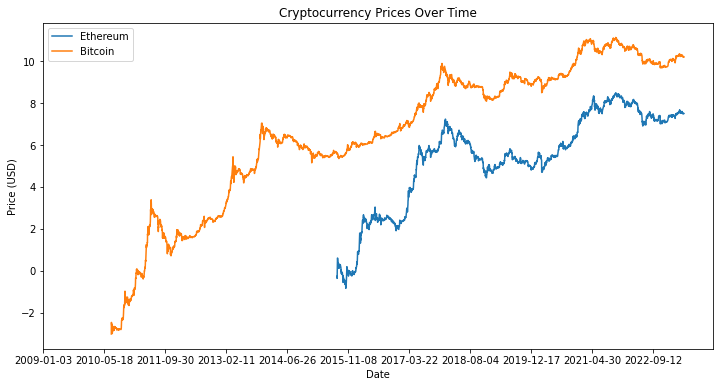

In [152]:
data_df['log_ethereum_price'] = np.log(data_df['ethereum_price_usd_num'])
data_df['log_bitcoin_price'] = np.log(data_df['price_usd_num'])
plt.figure(figsize=(12, 6))

# 第一个加密货币的折线图
plt.plot(data_df.index, data_df['log_ethereum_price'], label='Ethereum')

# 第二个加密货币的折线图
plt.plot(data_df.index, data_df['log_bitcoin_price'], label='Bitcoin')

# 图形标题
plt.title('Cryptocurrency Prices Over Time')

# x轴标签
plt.xlabel('Date')

# y轴标签
plt.ylabel('Price (USD)')
plt.xticks(data_df.index[::500]) 

# 图例
plt.legend()

# 显示图形
plt.show()


In [146]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import coint

# 假设你有一个DataFrame df，包含不同加密货币的价格数据
# 选择日期范围为2015-08-08到2023-05-21的数据
start_date = '2015-08-08'
end_date = '2023-05-21'
df = data_df.loc[start_date:end_date, ['ethereum_price_usd_num', 'price_usd_num']]

df.dropna(inplace=True)

# 因果关系分析
def granger_causality_test(data, maxlag):
    results = grangercausalitytests(data, maxlag)
    for lag in results.keys():
        print(f"Lag Order: {lag}")
        print(f"Test Statistic: {results[lag][0]['ssr_ftest'][0]}")
        print(f"P-value: {results[lag][0]['ssr_ftest'][1]}")
        print("")

# 执行因果关系分析
granger_causality_test(df, maxlag=1)

# 协整性分析
def cointegration_test(data):
    result = coint(data['price_usd_num'], data['ethereum_price_usd_num'])
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[2]}")

# 执行协整性分析
cointegration_test(df)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=27.7847 , p=0.0000  , df_denom=2840, df_num=1
ssr based chi2 test:   chi2=27.8140 , p=0.0000  , df=1
likelihood ratio test: chi2=27.6788 , p=0.0000  , df=1
parameter F test:         F=27.7847 , p=0.0000  , df_denom=2840, df_num=1
Lag Order: 1
Test Statistic: 27.784663311693684
P-value: 1.4576590914160776e-07

Test Statistic: -3.7706435966565803
P-value: 0.014827034946550143
Critical Values: [-3.90029638 -3.33828002 -3.04594214]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 读取比特币价格数据
prices = data_df['price_usd_num'].values.reshape(-1, 1)

# 数据归一化


# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create time window sequences
window_size = 7  # Use past 7 days' prices as input to predict the next day's price
X = []
y = []
for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i-window_size:i, 0])
    y.append(scaled_prices[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict with the model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions
plt.plot(prices[train_size+window_size:], color='blue', label='Actual Prices')
plt.plot(predictions, color='red', label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()
